### Part f)

#### Two-Fermion Lipkin Model

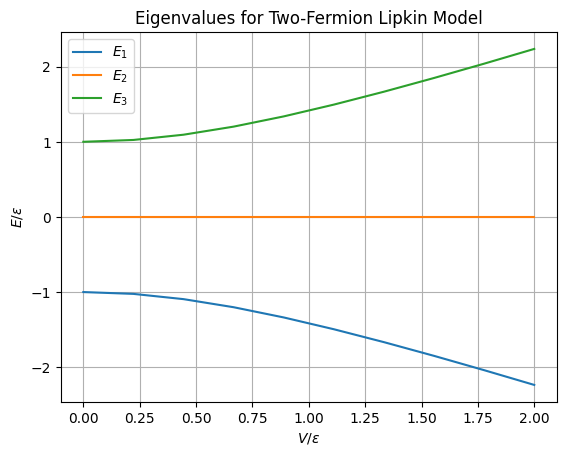

In [1]:
import sys

import numpy as np
from matplotlib import pyplot as plt

sys.path.insert(0, "../../src/python")
from vqe_lipkin import exact_energies

# parameters
N = 2
eps = 1
W = 0
V_array = np.linspace(0, 2, 10)

energies = exact_energies(N, eps, W, V_array)

for i in range(energies.shape[1]):
  plt.plot(V_array, energies[:, i], label=f"$E_{i + 1}$")
plt.xlabel(r"$V/\epsilon$")
plt.ylabel(r"$E/\epsilon$")
plt.title("Eigenvalues for Two-Fermion Lipkin Model")
plt.legend()
plt.grid(True)
# plt.savefig("vqe_lipkin_twofermion_exact.pdf", format="pdf")
plt.show()

#### Four-Fermion Lipkin Model

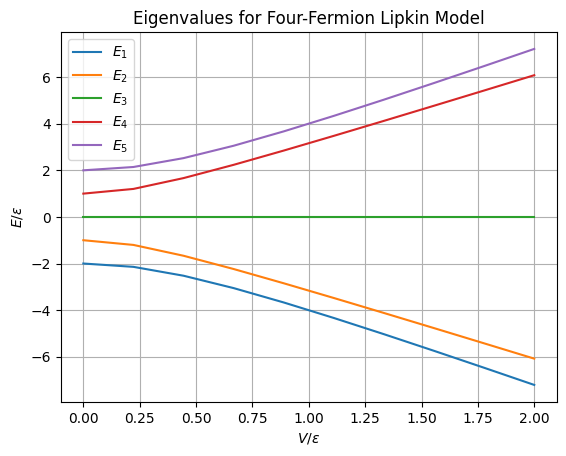

In [2]:
import sys

import numpy as np
from matplotlib import pyplot as plt

sys.path.insert(0, "../../src/python")
from vqe_lipkin import exact_energies

# parameters
N = 4
eps = 1
W = 0
V_array = np.linspace(0, 2, 10)

energies = exact_energies(N, eps, W, V_array)

for i in range(energies.shape[1]):
  plt.plot(V_array, energies[:, i], label=f"$E_{i + 1}$")
plt.xlabel(r"$V/\epsilon$")
plt.ylabel(r"$E/\epsilon$")
plt.title("Eigenvalues for Four-Fermion Lipkin Model")
plt.legend()
plt.grid(True)
# plt.savefig("vqe_lipkin_fourfermion_exact.pdf", format="pdf")
plt.show()

### Part g)

#### Two-Fermion Lipkin Model


Processing lambda = 0.0000 (1/10)
Optimization completed after 8 epochs (1.71 seconds)
Final energy: -0.07800000
Final angles: [1.8194421  1.05206336 0.69791799 1.84240292]

Processing lambda = 0.2222 (2/10)
Epoch 50: Energy = -1.018889, Change = 0.001667
Epoch 100: Energy = -1.035556, Change = 0.000222
Epoch 150: Energy = -1.022778, Change = 0.002333
Early stopping after 175 epochs with no improvement
Optimization completed after 175 epochs (13.85 seconds)
Final energy: -1.02611111
Final angles: [3.12806204 0.22807563 3.15565946 3.15203483]

Processing lambda = 0.4444 (3/10)
Epoch 50: Energy = -1.086889, Change = 0.001778
Epoch 100: Energy = -1.103111, Change = 0.003667
Early stopping after 124 epochs with no improvement
Optimization completed after 124 epochs (9.26 seconds)
Final energy: -1.09022222
Final angles: [ 3.15321347  0.40277531  0.039472   -0.01312905]

Processing lambda = 0.6667 (4/10)
Epoch 50: Energy = -1.155667, Change = 0.019000
Optimization completed after 83 epochs 

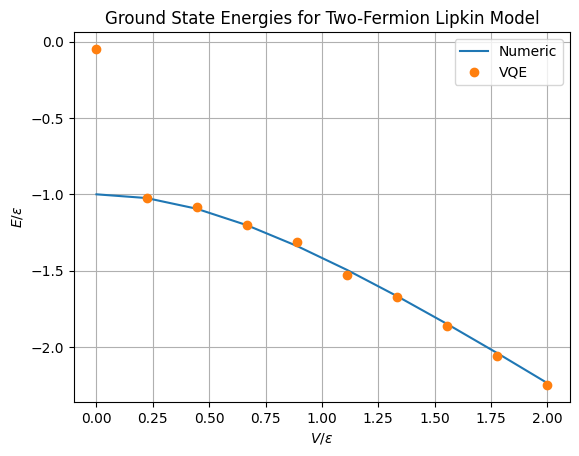

In [1]:
from functools import partial
import sys

from matplotlib import pyplot as plt
import numpy as np

sys.path.insert(0, "../../src/python")
from vqe_lipkin import energy_expectation_two_fermions, exact_energies
from vqe_utils import vqe_energies, scipy_vqe_energies

# np.random.seed(42)

# parameters
eps = 1
W = 0
V_array = np.linspace(0, 2, 10)

energies_exact = exact_energies(2, eps, W, V_array)

energy_expectation = partial(energy_expectation_two_fermions, eps=eps, W=W)

shots = 1000
learning_rate = 0.1
epochs = 500

energies_approx, _, _ = vqe_energies(
  4, energy_expectation, V_array, shots, epochs, learning_rate, "adam", True
)
# energies_approx = scipy_vqe_energies(
#  4, energy_expectation, V_array, shots, "Powell", 1000, 1e-5
# )

plt.plot(V_array, energies_exact[:, 0], label="Numeric")
plt.plot(V_array, energies_approx, marker="o", linestyle="None", label="VQE")
plt.xlabel(r"$V/\epsilon$")
plt.ylabel(r"$E/\epsilon$")
plt.title("Ground State Energies for Two-Fermion Lipkin Model")
plt.grid(True)
plt.legend()
# plt.savefig("vqe_lipkin_twofermion_result.pdf", format="pdf")
plt.show()

#### Four-Fermion Lipkin Model


Processing lambda = 0.0000 (1/10)
Optimization completed after 36 epochs (26.51 seconds)
Final energy: -0.99800000
Final angles: [ 3.08963385  3.16639736  3.14063808 -0.01259277  3.11002039  3.16912131
  0.02112627 -0.04059485]

Processing lambda = 0.2222 (2/10)
Epoch 50: Energy = -1.833889, Change = 0.007556
Epoch 100: Energy = -2.004222, Change = 0.003111
Early stopping after 144 epochs with no improvement
Optimization completed after 144 epochs (105.49 seconds)
Final energy: -2.02666667
Final angles: [ 3.14447476  0.00974325 -0.01825739  0.00315051  3.14765125  3.14097346
  0.05387119  0.01157099]

Processing lambda = 0.4444 (3/10)
Epoch 50: Energy = -1.732111, Change = 0.101556
Epoch 100: Energy = -1.964444, Change = 0.032778
Epoch 150: Energy = -2.009000, Change = 0.018667
Early stopping after 152 epochs with no improvement
Optimization completed after 152 epochs (111.07 seconds)
Final energy: -1.99066667
Final angles: [2.28158839e-03 3.15752585e+00 8.17118239e-04 4.95182569e-03


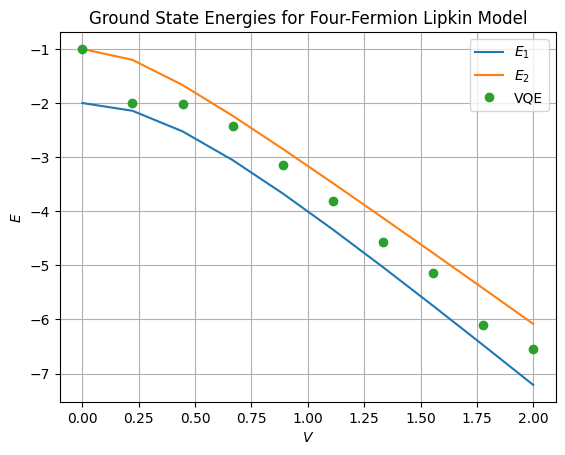

In [ ]:
from functools import partial
import sys

import numpy as np
from matplotlib import pyplot as plt

sys.path.insert(0, "../../src/python")
from vqe_lipkin import (
  energy_expectation_four_fermions,
  qiskit_energy_expectation_four_fermions,
  exact_energies,
)
from vqe_utils import vqe_energies, scipy_vqe_energies

# parameters
eps = 1
W = 0
V_array = np.linspace(0, 2, 10)

energies_exact = exact_energies(4, eps, W, V_array)


energy_expectation = partial(energy_expectation_four_fermions, eps=eps, W=W)

shots = 1000
learning_rate = 0.1
epochs = 500

energies_approx, _, _ = vqe_energies(
  8, energy_expectation, V_array, shots, epochs, learning_rate, "adam", True
)
# energies_approx = scipy_vqe_energies(
#  8, energy_expectation, V_array, shots, "Powell", 1000, 1e-5
# )

for i in range(2):
  plt.plot(V_array, energies_exact[:, i], label=f"$E_{i + 1}$")
plt.plot(V_array, energies_approx, marker="o", linestyle="None", label="VQE")
plt.xlabel(r"$V$")
plt.ylabel(r"$E$")
plt.title("Ground State Energies for Four-Fermion Lipkin Model")
plt.grid(True)
plt.legend()
# plt.savefig("vqe_lipkin_fourfermion_result.pdf", format="pdf")
plt.show()